# Project 1: Understanding Raw Data with Pandas

This notebook explores a dataset to understand its structure, variables, and basic statistics.
The goal is to practice initial data exploration using Pandas.


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





## Loading the dataset

In this step, the dataset is loaded from a CSV file to begin the exploratory data analysis process.


In [111]:
df = pd.read_csv("data/Daily_Minimum_Temperatures.csv")


## Understanding the dataset structure

The following steps examine the dataset structure, data types, and basic statistics.


### Previewing the dataset

The first rows of the dataset are displayed to understand the type of data and the structure of each column.


In [112]:
df.head()

,Date,Temp
0,01/01/81,20.7
1,01/02/81,17.9
2,01/03/81,18.8
3,01/04/81,14.6
4,01/05/81,15.8


## Dataset overview

This step examines the dataset size, data types, and checks for missing values.


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


Both columns are initially read as object types, indicating that data type conversion may be required.


## Dataset dimensions

The shape of the dataset is used to identify the number of rows and columns.


In [114]:
df.shape

(3650, 2)

## Column names

The column names are displayed to understand the available variables.


In [115]:
df.columns

Index(['Date', 'Temp'], dtype='object')

## Data type conversion

The dataset contains columns stored as object types that should be treated as numerical and datetime values.  
These columns are converted to appropriate data types to enable proper analysis and time-based operations.


In [116]:
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


C:\Users\vpdio\AppData\Local\Temp\ipykernel_71988\3685113308.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


After converting the data types, the dataset is ready for numerical and time-based analysis.


## Descriptive statistics

Descriptive statistics are used to summarize the central tendency and variability of the numerical data, providing an overview of temperature distribution.


In [117]:
df.describe()


,Date,Temp
count,3650,3647.000000
mean,1985-12-31 07:12:00,11.186647
min,1981-01-01 00:00:00,0.000000
25%,1983-07-02 06:00:00,8.300000
50%,1985-12-31 12:00:00,11.000000
75%,1988-06-30 18:00:00,14.000000
max,1990-12-31 00:00:00,26.300000
std,NaN,4.061671


For datetime columns, descriptive statistics represent temporal summaries such as the earliest date, latest date, and time-based quartiles.


## Creating temporal features

To enable time-based analysis, additional temporal features such as year and month are extracted from the date column.


In [118]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month


In [119]:
df.head()

,Date,Temp,year,month
0,1981-01-01,20.7,1981,1
1,1981-01-02,17.9,1981,1
2,1981-01-03,18.8,1981,1
3,1981-01-04,14.6,1981,1
4,1981-01-05,15.8,1981,1


In [120]:
df['month_name'] = df['Date'].dt.month_name()
df.head()

,Date,Temp,year,month,month_name
0,1981-01-01,20.7,1981,1,January
1,1981-01-02,17.9,1981,1,January
2,1981-01-03,18.8,1981,1,January
3,1981-01-04,14.6,1981,1,January
4,1981-01-05,15.8,1981,1,January


## Datetime string formatting (reference)

Datetime formatting functions can be used to convert datetime values into human-readable string formats.  
This step is included as a reference for datetime manipulation and presentation purposes.


In [121]:
df['year_str'] = df['Date'].dt.strftime('%Y')
df['month_str'] = df['Date'].dt.strftime('%B')

df[['Date', 'year_str', 'month_str']].head()


,Date,year_str,month_str
0,1981-01-01,1981,January
1,1981-01-02,1981,January
2,1981-01-03,1981,January
3,1981-01-04,1981,January
4,1981-01-05,1981,January


To confirm the effect of datetime string formatting, the data types of the newly created columns are examined.


In [122]:
df[['year_str', 'month_str']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_str   3650 non-null   object
 1   month_str  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


String-formatted datetime columns are useful for display purposes, while numerical temporal features are preferred for analysis.


## Aggregating data by month

To identify seasonal patterns, the data is aggregated by month to calculate the average daily minimum temperature.


In [123]:
monthly_avg_named = df.groupby('month_name')['Temp'].mean()
monthly_avg


month_name
April        12.088333
August        7.891290
December     13.851948
February     15.373759
January      15.030323
July          6.754397
June          7.278333
March        14.565484
May           9.866452
November     12.479667
October      10.309355
September     8.976333
Name: Temp, dtype: float64

In [124]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_avg_named = monthly_avg_named.reindex(month_order)
monthly_avg_named


month_name
January      15.030323
February     15.373759
March        14.565484
April        12.088333
May           9.866452
June          7.278333
July          6.754397
August        7.891290
September     8.976333
October      10.309355
November     12.479667
December     13.851948
Name: Temp, dtype: float64

## Visualizing monthly temperature patterns

The monthly average temperatures are visualized to highlight seasonal trends throughout the year.


## Visualizing monthly temperature patterns

The monthly average temperatures are visualized to highlight seasonal trends throughout the year.


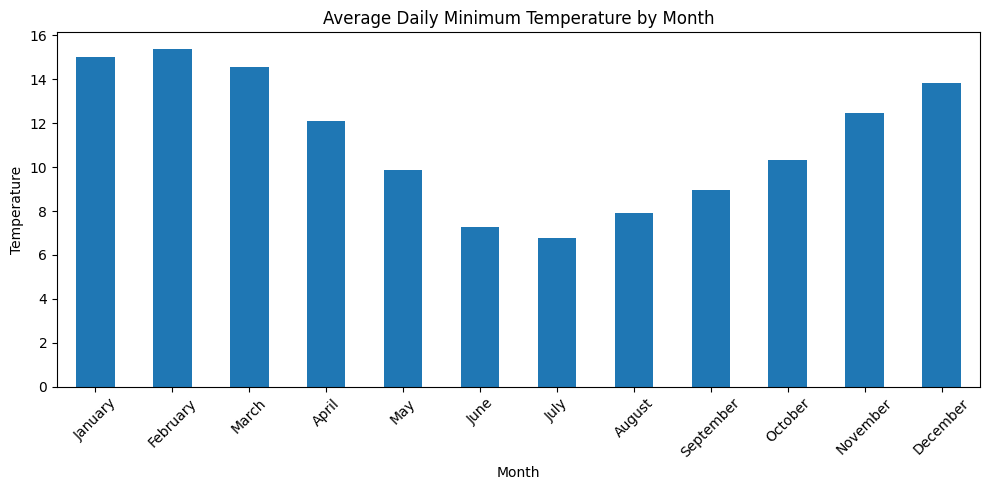

In [125]:
plt.figure(figsize=(10, 5))
monthly_avg_named.plot(kind='bar')
plt.title('Average Daily Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The results show clear seasonal variation, with higher average temperatures during the summer months (December–February) and lower values during winter (June–August), consistent with a Southern Hemisphere climate.


## Conclusions

- The dataset was explored and cleaned through data type conversion.
- Temporal features enabled meaningful aggregation by month.
- Seasonal temperature patterns were identified using simple aggregation and visualization.
